# <font color='blue'>Neural Network with Programming and Mathematics</font>
# <font color='blue'>To predict the occurrence of cancer</font>


We will have 2 parts:

- Part 1 - Let's build an artificial neural network with only mathematical operations
- Part 2 - Let's Train the Network to Predict the Occurrence of Cancer

## The Architecture of Artificial Neural Networks

A typical neural network consists of a set of interconnected neurons, influencing each other, forming a larger system, capable of storing knowledge acquired through presented examples and, thus, being able to make inferences about new data sets. Let's look at the architecture of artificial neural networks.

Neural networks are commonly presented as an oriented graph, where vertices are neurons and edges are synapses. The direction of the edges informs the type of feeding, that is, how the neurons are fed (receive input signals). Neural networks derive their power from their massive, parallel structure and ability to learn from experience. This experience is transmitted through examples obtained from the real world, defined as a set of characteristics formed by input and output data. If we present these input and output data to the network, we are facing supervised learning and if we only present the input data, we are facing unsupervised learning!

The knowledge obtained by the network through the examples is stored in the form of connection weights, which will be adjusted in order to make correct decisions from new inputs, that is, new real-world situations not known by the network. The process of adjusting the synaptic weights is carried out by the learning algorithm, responsible for storing the real world knowledge obtained through examples in the network. There are several learning algorithms, among them the backpropagation which is the most used algorithm.


### Importing Packages

In [1]:
# For now we only need NumPy
import numpy as np

### Part 1 - Implementing an Artificial Neural Network with Only Mathematical Formulas (Without Frameworks)

### Part 1A - Forward Propagation

### Developing the Function to Initialize Weights

In [2]:
def inicializa_parametros(dims_camada_entrada):
    
    parameters = {}
    
    comp = len(dims_camada_entrada)
    
    for i in range(1, comp):
        
        parameters["W" + str(i)] = np.random.randn(dims_camada_entrada[i], dims_camada_entrada[i - 1]) * 0.01
        
        parameters["b" + str(i)] = np.zeros((dims_camada_entrada[i], 1))
    
    return parameters

### Developing the Sigmoid Function

The main reason we use the sigmoid function is because it allows us to convert numbers to values ​​between 0 and 1.

Therefore, it is especially used for models where we have to predict probability as an output. Since the probability of anything existing only between the range of 0 and 1, sigmoid is the right choice.

In [3]:
def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    return A, Z

### Developing the ReLU Function

To use stochastic gradient descent with backpropagation errors to train deep neural networks, you need an activation function that looks and acts like a linear function, but is in fact a nonlinear function that allows for complex relationships in the data. are learned.

The solution is to use the rectified linear activation function, or ReL for short. A node or unit that implements this activation function is called a rectified linear activation unit, or ReLU for short. Networks that use the rectifier function for the hidden layers are often called rectified networks.

The ReLU function is defined as 𝑓(𝑥) = max(0, 𝑥). Typically, it is applied element by element to the output of some other function, such as a vector and matrix product.

In [4]:
def relu(Z):
    A = abs(Z * (Z > 0))
    return A, Z

### Developing Linear Activation

In [5]:
# activation operation
# A is the array with the input data
# W is the matrix of weights
# b is the bias
def linear_activation(A, W, b):
    Z = np.dot(W, A) + b
    cache = (A, W, b)
    return Z, cache

### Building the Forward Propagation Process

In [6]:
# Forward movement
def forward(A_prev, W, b, activation):
    
   # If the activation function is Sigmoid, we enter this block
    if activation == "sigmoid":
        Z, linear_cache = linear_activation(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
        
    # If not, if it is ReLu, enter this block
    elif activation == "relu":
        Z, linear_cache = linear_activation(A_prev, W, b)
        A, activation_cache = relu(Z)
        
    cache = (linear_cache, activation_cache)
    
    return A, cache

### Combining Activation and Propagation

In [7]:
# forward propagation
def forward_propagation(X, parameters):
    
    caches = []
    
    A = X
    
    L = len(parameters) // 2

    for i in range(1, L):
      
        A_prev = A
        
        A, cache = forward(A_prev, parameters["W" + str(i)], parameters["b" + str(i)], activation = "relu")
        
        caches.append(cache)
    
    A_last, cache = forward(A, parameters["W" + str(L)], parameters["b" + str(L)], activation = "sigmoid")
    
    caches.append(cache)
    
    return(A_last, caches)

### Developing the Cost Function

In [8]:
def calcula_custo(A_last, Y):
    
    m = Y.shape[1]
    
    custo = (-1 / m) * np.sum((Y * np.log(A_last)) + ((1 - Y) * np.log(1 - A_last)))
    
    custo = np.squeeze(custo)
    
    return(custo)

### Parte 1B - Backward Propagation

### Developing the Backward Propagation - Backward Sigmoid Function

In [9]:
def sigmoid_backward(da, Z):
    
    dg = (1 / (1 + np.exp(-Z))) * (1 - (1 / (1 + np.exp(-Z))))
    
    dz = da * dg
    return dz


### Developing Backward Propagation - ReLu Backward Function

In [10]:
def relu_backward(da, Z):
    
    dg = 1 * ( Z >= 0)
    dz = da * dg
    return dz

### Developing Backward Propagation - Linear Backward Activation

In [11]:
def linear_backward_function(dz, cache):
    
    A_prev, W, b = cache

    m = A_prev.shape[1]
 
    dW = (1 / m) * np.dot(dz, A_prev.T)
    
    db = (1 / m) * np.sum(dz, axis = 1, keepdims = True)
    
    dA_prev = np.dot(W.T, dz)
    
    return dA_prev, dW, db

### Developing Backward Propagation - Linear Backward Activation

In [12]:
def linear_activation_backward(dA, cache, activation):

    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward_function(dZ, linear_cache)
        
    if activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward_function(dZ, linear_cache)
        
    return dA_prev, dW, db

### Combining Activation and Backpropagation - Backpropagation Algorithm

In [13]:
# Backpropagation algorithm (calculates the gradients to update the weights)
# AL = Expected value in the Forward
# Y = Actual value
def backward_propagation(AL, Y, caches):
    
    grads = {}
   
    L = len(caches)

    m = AL.shape[1]
  
    Y = Y.reshape(AL.shape)
    
    dAL = -((Y / AL) - ((1 - Y) / (1 - AL)))
    
    current_cache = caches[L - 1]
    
    grads["dA" + str(L - 1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    
    for l in reversed(range(L - 1)):
        
        current_cache = caches[l]
        
        dA_prev, dW, db = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        
        grads["dA" + str(l)] = dA_prev
        grads["dW" + str(l + 1)] = dW
        grads["db" + str(l + 1)] = db
        
    return grads

### Gradients and Weights Update

In [14]:
def atualiza_pesos(parameters, grads, learning_rate):
    
    L = len(parameters)//2
    
    for l in range(L):
        
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - (learning_rate * grads["dW" + str(l + 1)])
        
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - (learning_rate * grads["db" + str(l + 1)])
    
    return parameters

### Implementing the Complete Network

In [15]:
def modeloNN(X, Y, dims_camada_entrada, learning_rate = 0.0075, num_iterations = 100):
    
    custos = []
    
    parametros = inicializa_parametros(dims_camada_entrada)
    
    for i in range(num_iterations):
        
        AL, caches = forward_propagation(X, parametros)
        
        custo = calcula_custo(AL, Y)
       

        gradientes = backward_propagation(AL, Y, caches)
        
        parametros = atualiza_pesos(parametros, gradientes, learning_rate)
        
        if i % 10 == 0:
            print("Custo Após " + str(i) + " iterações é " + str(custo))
            custos.append(custo)
            
    return parametros, custos 

In [16]:
def predict(X, parametros):
    AL, caches = forward_propagation(X, parametros)
    return AL

### Part 2 - Let's Train the Network to Predict the Occurrence of Cancer

### Using the Neural Network to Predict the Occurrence of Cancer

In [17]:
# Imports
import sklearn
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Loading Data
https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset

In [18]:
# Load the complete object
temp = load_breast_cancer()

In [19]:
type(temp)

sklearn.utils._bunch.Bunch

In [20]:
# Load the dataset
dados = pd.DataFrame(columns = load_breast_cancer()["feature_names"], data = load_breast_cancer()["data"])

In [21]:
# Shape
dados.shape

(569, 30)

In [22]:
# Visualize the data
dados.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
# Check for missing values
dados.isnull().any()

mean radius                False
mean texture               False
mean perimeter             False
mean area                  False
mean smoothness            False
mean compactness           False
mean concavity             False
mean concave points        False
mean symmetry              False
mean fractal dimension     False
radius error               False
texture error              False
perimeter error            False
area error                 False
smoothness error           False
compactness error          False
concavity error            False
concave points error       False
symmetry error             False
fractal dimension error    False
worst radius               False
worst texture              False
worst perimeter            False
worst area                 False
worst smoothness           False
worst compactness          False
worst concavity            False
worst concave points       False
worst symmetry             False
worst fractal dimension    False
dtype: boo

In [24]:
# Separate the target variable
target = load_breast_cancer()["target"]

In [25]:
type(target)

numpy.ndarray

In [26]:
# Display the target variable
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [27]:
# Total records per class - Benign Cancer
np.count_nonzero(target == 1)

357

In [28]:
# Total records per class - Malignant Cancer
np.count_nonzero(target == 0)

212

In [29]:
# Let's extract the labels

# Dictionary for labels
labels = {}

target_names = load_breast_cancer()["target_names"]

for i in range(len(target_names)):
    labels.update({i:target_names[i]})

In [30]:
labels

{0: 'malignant', 1: 'benign'}

In [31]:
X = np.array(dados)

In [32]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [33]:
# Divide the input and output data into training and testing
X_treino, X_teste, y_treino, y_teste = train_test_split(X, target, test_size = 0.15, shuffle = True)

In [34]:
# Shape
print(X_treino.shape)
print(y_treino.shape)

(483, 30)
(483,)


In [35]:
# Shape 
print(X_teste.shape)
print(y_teste.shape)

(86, 30)
(86,)


In [36]:
# Adjust the shape of the input data
X_treino = X_treino.T
X_teste = X_teste.T

In [37]:
print(X_treino.shape)
print(X_teste.shape)

(30, 483)
(30, 86)


In [38]:
# We also need to adjust the output data
y_treino = y_treino.reshape(1, len(y_treino))
y_teste = y_teste.reshape(1, len(y_teste))

In [39]:
print(y_treino.shape)
print(y_teste.shape)

(1, 483)
(1, 86)


In [40]:
# Variable with the input dimensions for the number of neurons
dims_camada_entrada = [X_treino.shape[0], 50, 20, 5, 1]

In [41]:
dims_camada_entrada

[30, 50, 20, 5, 1]

In [42]:
# Model training

print("\nStarting Training.\n")

parametros, custo = modeloNN(X = X_treino, 
                             Y = y_treino, 
                             dims_camada_entrada = dims_camada_entrada, 
                             num_iterations = 3000, 
                             learning_rate = 0.0075)

print("\nCompleted Training.\n")


Starting Training.

Custo Após 0 iterações é 0.6931529941978519
Custo Após 10 iterações é 0.6919194634955292
Custo Após 20 iterações é 0.6907313364469126
Custo Após 30 iterações é 0.6895869371365363
Custo Após 40 iterações é 0.6884846500175523
Custo Após 50 iterações é 0.6874229154164153
Custo Após 60 iterações é 0.6864002303136065
Custo Após 70 iterações é 0.6854151446957311
Custo Após 80 iterações é 0.6844662618845376
Custo Após 90 iterações é 0.6835522362272949
Custo Após 100 iterações é 0.6826717532882193
Custo Após 110 iterações é 0.6818235628489049
Custo Após 120 iterações é 0.6810064466693692
Custo Após 130 iterações é 0.6802192406833479
Custo Após 140 iterações é 0.6794608243437809
Custo Após 150 iterações é 0.6787301695414631
Custo Após 160 iterações é 0.6780262555953636
Custo Após 170 iterações é 0.677348114101808
Custo Após 180 iterações é 0.6766948185273274
Custo Após 190 iterações é 0.6760654178572152
Custo Após 200 iterações é 0.6754590245961413
Custo Após 210 iterações 

Custo Após 1770 iterações é 0.31277147572366026
Custo Após 1780 iterações é 0.3108875056739424
Custo Após 1790 iterações é 0.3090158376808943
Custo Após 1800 iterações é 0.30846842259043833
Custo Após 1810 iterações é 0.3068293807919803
Custo Após 1820 iterações é 0.3023294581277787
Custo Após 1830 iterações é 0.3043131389192641
Custo Após 1840 iterações é 0.3034654947030089
Custo Após 1850 iterações é 0.29848705652355906
Custo Após 1860 iterações é 0.2899453933495967
Custo Após 1870 iterações é 0.29088079179510734
Custo Após 1880 iterações é 0.2888494750591845
Custo Após 1890 iterações é 0.2895893718440689
Custo Após 1900 iterações é 0.2905995819720762
Custo Após 1910 iterações é 0.2879575800513603
Custo Após 1920 iterações é 0.2850421822966877
Custo Após 1930 iterações é 0.285293855544169
Custo Após 1940 iterações é 0.28466647873034073
Custo Após 1950 iterações é 0.2849821937522044
Custo Após 1960 iterações é 0.28581568315974104
Custo Após 1970 iterações é 0.28276386498159756
Custo A

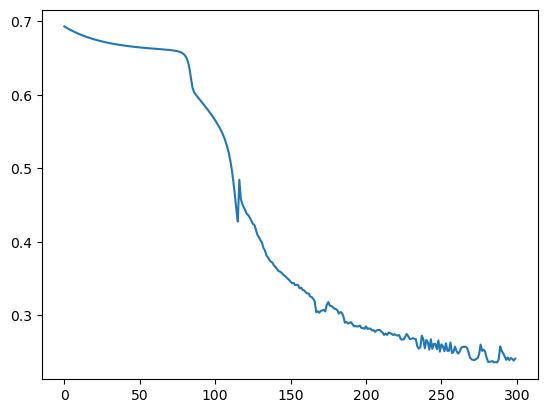

In [43]:
# Error plot during training
plt.plot(custo)

In [44]:
# Predictions with training data
y_pred_treino = predict(X_treino, parametros)

In [45]:
# Adjusted the shape in training
y_pred_treino = y_pred_treino.reshape(-1)
y_treino = y_treino.reshape(-1)

In [46]:
y_pred_treino = 1 * (y_pred_treino > 0.5)

In [47]:
# We calculate accuracy by comparing actual value with predicted value
acc_treino = sum(1 * (y_pred_treino == y_treino)) / len(y_pred_treino) * 100

In [48]:
print("Accuracy in training data: " + str(acc_treino))

Accuracy in training data: 91.92546583850931


In [49]:
print(classification_report(y_treino, y_pred_treino, target_names = ['Maligno', 'Benigno']))

              precision    recall  f1-score   support

     Maligno       0.96      0.82      0.88       179
     Benigno       0.90      0.98      0.94       304

    accuracy                           0.92       483
   macro avg       0.93      0.90      0.91       483
weighted avg       0.92      0.92      0.92       483



In [50]:
# Predictions with the model using test data
y_pred_teste = predict(X_teste, parametros)

In [51]:
# Adjust the shapes
y_pred_teste = y_pred_teste.reshape(-1)
y_teste = y_teste.reshape(-1)

In [52]:
# Convert predictions to class binary value
y_pred_teste = 1 * (y_pred_teste > 0.5)

In [53]:
# Visualize the predictions
y_pred_teste

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1])

In [54]:
# Calculate the accuracy
acuracia = sum(1 * (y_pred_teste == y_teste)) / len(y_pred_teste) * 100

In [55]:
print("Accuracy in test data: " + str(acuracia))

Accuracy in test data: 94.18604651162791


In [56]:
print(classification_report(y_teste, y_pred_teste, target_names = ['Maligno', 'Benigno']))

              precision    recall  f1-score   support

     Maligno       1.00      0.85      0.92        33
     Benigno       0.91      1.00      0.95        53

    accuracy                           0.94        86
   macro avg       0.96      0.92      0.94        86
weighted avg       0.95      0.94      0.94        86



We can already conclude the project here, because we already have a model to Predict the Occurrence of Cancer with 91% of acurracy.